In [21]:
#import the dataset
import pandas as pd
data=pd.read_csv("C://Users//kajal kapasiya//Desktop//data science//dataset//kn_coding//KNN//Classified_Data.csv",index_col=0)
data.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [40]:
#drop target variable
dataset=data.drop('TARGET CLASS',axis=1)
dataset.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [41]:
#Make features normalized for uniform scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(dataset)
dataset1=sc.transform(dataset)
dataset1

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [43]:
#convert numpy array to dataframe
df=pd.DataFrame(dataset1)

In [44]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [104]:
#function to create histogram for all the features to see the distribution
import matplotlib.pyplot as plt
%matplotlib inline
def cur(dataf,leng):
    for i in range(leng):
        dataf[i].hist(bins=30)
    

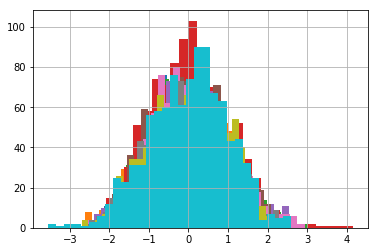

In [105]:
#calling the function
cur(df,len(df.columns))

In [106]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,data['TARGET CLASS'],test_size=0.30)

In [137]:
#KNeighborsClassifier algo function
from sklearn.neighbors import KNeighborsClassifier
#evaluating the model
from sklearn.metrics import classification_report,confusion_matrix
def knnclassifier(i,x,y,x1,y1):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y)
    pred=knn.predict(x1)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y1,pred))

In [141]:
#initially calling KNN with k=1 and see the accuracy
knnclassifier(1,x_train,y_train,x_test,y_test)

[[132  13]
 [ 14 141]]
             precision    recall  f1-score   support

          0       0.90      0.91      0.91       145
          1       0.92      0.91      0.91       155

avg / total       0.91      0.91      0.91       300



In [142]:
#calculate the right k value using elbow method
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    err_rate.append(np.mean(pred!=y_test))

Text(0,0.5,'error rate')

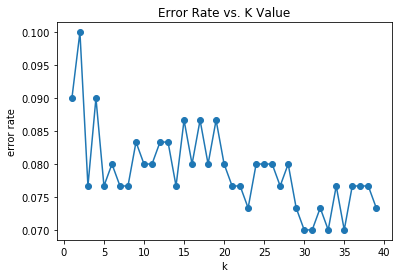

In [143]:
plt.plot(range(1,40),err_rate,marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('k')
plt.ylabel('error rate')

In [144]:
#after k=29,error rate is floating below 0.077 hence lets see at k=29
knnclassifier(29,x_train,y_train,x_test,y_test)

[[132  13]
 [  9 146]]
             precision    recall  f1-score   support

          0       0.94      0.91      0.92       145
          1       0.92      0.94      0.93       155

avg / total       0.93      0.93      0.93       300

